In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 29 17:40:21 2017

@author: amyse
"""

import os
os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32'
os.environ['CPLUS_INCLUDE_PATH'] = 'C:/Users/amyse/CUDA/v8.0/include'
#
#
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D,ZeroPadding3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
import random
import theano
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import KFold

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce 940M (0000:04:00.0)
C:\Users\amyse\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# image specification
img_rows,img_cols,img_depth=16,16,11
kernel_size = 3
# Training data

X_tr=[]           # variable to store entire dataset
label=[]
actions=[]

count=0
folders = os.listdir('kth dataset/')
#folders=['32','59']
for dir_ in folders:
    appen=  'kth dataset' + '/' + dir_+'/'
    listing = os.listdir(appen)
    for vid in listing:
        vid = appen+vid
        frames = []
        cap = cv2.VideoCapture(vid)
        fps = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        

        fr = np.sort(random.sample(range(10, int(fps)), 11))
        for k in np.arange(int(fps)):
            
            if k in fr:
                ret, frame = cap.read(int(k))               
                frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                frames.append(gray)
                
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
        
        cap.release()
        cv2.destroyAllWindows()
        ipt=np.rollaxis(np.rollaxis(np.array(frames),2,0),2,0)
        X_tr.append(ipt)
        label.append(count)
        
    count += 1
    print(dir_)


boxing
handclapping
handwaving
jogging
running
walking


In [3]:
label= np.array(label)
X_t=np.array(X_tr)

# Split the data
X_tr_array, y_tr, y_t,y_te =  train_test_split(X_t, label, test_size=0.2, random_state=4)

num_samples = X_tr_array.shape[0]
print(num_samples)

#Assign Label to each class

train_data = [X_tr_array,y_t]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_tr_array.shape)

train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))

for h in np.arange(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]
    
test_data = [y_tr,y_te]

(t_train, t_label) = (test_data[0],test_data[1])


test_set = np.zeros((y_tr.shape[0], 1, img_rows,img_cols,img_depth))

for h in np.arange(y_tr.shape[0]):
    test_set[h][0][:][:][:]=t_train[h,:,:,:]

479
X_Train shape: (479, 16, 16, 11)


In [17]:
y_te[0:4]

array([4, 5, 3, 3])

In [4]:
test_data = [y_tr,y_te]

(t_train, t_label) = (test_data[0],test_data[1])


test_set = np.zeros((120, 1, img_rows,img_cols,img_depth))

for h in np.arange(120):
    test_set[h][0][:][:][:]=t_train[h,:,:,:]

In [24]:
patch_size = 5   # img_depth or number of frames used for each video



print(train_set.shape, 'train samples')

# number of folds
nth=3
# CNN Training parameters

batch_size = 10
nb_classes = label.max()+1
nb_epoch =100

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)


# number of convolutional filters to use at each layer
nb_filters = [32, 32]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [3, 3]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [5,5]

# Pre-processing

train_set = train_set.astype('float32')

train_set -= np.mean(train_set)

train_set /=np.max(train_set)



(479, 1, 16, 16, 11) train samples


In [6]:
# Define model
kernel_size = 3

model = Sequential()

model.add(Convolution3D(nb_filters[0], kernel_dim1=nb_conv[0], kernel_dim2=nb_conv[0], kernel_dim3=nb_conv[0],
                        input_shape=(1, img_rows, img_cols, img_depth), activation='relu'))

model.add(Convolution3D(64, 3, 3, 3, activation='relu',
                            border_mode='same', name='conv1',
                            subsample=(1, 1, 1),
                            input_shape=(3, 16, 112, 112)))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))

model.add(Dropout(0.7))

model.add(Flatten())

model.add(Dense(128, activation="relu",kernel_initializer="normal"))

model.add(Dropout(0.7))

model.add(Dense(nb_classes, kernel_initializer="normal"))

model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])

  


C:\Users\amyse\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, (5, 5, 5), activation="relu", input_shape=(1, 16, 16...)`
  import sys
C:\Users\amyse\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, (3, 3, 3), activation="relu", strides=(1, 1, 1), input_shape=(3, 16, 11..., padding="same", name="conv1")`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 32, 12, 12, 7)     4032      
_________________________________________________________________
conv1 (Conv3D)               (None, 64, 12, 12, 7)     55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 64, 4, 4, 2)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 4, 4, 2)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

KFold(n_splits=3, random_state=None, shuffle=True)
Train on 319 samples, validate on 160 samples
Epoch 1/100
319/319 [==============================] - 1s - loss: 0.7542 - acc: 0.7931 - val_loss: 0.3050 - val_acc: 0.9125
Epoch 2/100
319/319 [==============================] - 1s - loss: 0.4724 - acc: 0.8307 - val_loss: 0.4582 - val_acc: 0.8750
Epoch 3/100
319/319 [==============================] - 1s - loss: 0.6464 - acc: 0.8150 - val_loss: 0.3024 - val_acc: 0.9125
Epoch 4/100
319/319 [==============================] - 1s - loss: 0.6686 - acc: 0.7962 - val_loss: 0.3269 - val_acc: 0.8812
Epoch 5/100
319/319 [==============================] - 1s - loss: 0.7544 - acc: 0.8339 - val_loss: 0.3114 - val_acc: 0.8937
Epoch 6/100
319/319 [==============================] - 1s - loss: 0.7639 - acc: 0.8056 - val_loss: 0.4123 - val_acc: 0.88750
Epoch 7/100
319/319 [==============================] - 1s - loss: 0.6124 - acc: 0.8213 - val_loss: 0.3245 - val_acc: 0.8812
Epoch 8/100
319/319 [=============

319/319 [==============================] - 1s - loss: 0.7050 - acc: 0.8182 - val_loss: 0.5034 - val_acc: 0.84370.81
Epoch 65/100
319/319 [==============================] - 1s - loss: 0.5325 - acc: 0.8370 - val_loss: 0.5334 - val_acc: 0.8125
Epoch 66/100
319/319 [==============================] - 1s - loss: 0.4359 - acc: 0.8401 - val_loss: 0.4076 - val_acc: 0.8312
Epoch 67/100
319/319 [==============================] - 1s - loss: 0.4614 - acc: 0.8495 - val_loss: 0.4508 - val_acc: 0.8375
Epoch 68/100
319/319 [==============================] - 1s - loss: 0.5168 - acc: 0.8401 - val_loss: 0.4814 - val_acc: 0.8312
Epoch 69/100
319/319 [==============================] - 1s - loss: 0.5575 - acc: 0.8276 - val_loss: 0.6419 - val_acc: 0.8125
Epoch 70/100
319/319 [==============================] - 1s - loss: 0.4010 - acc: 0.8558 - val_loss: 0.5609 - val_acc: 0.8250
Epoch 71/100
319/319 [==============================] - 1s - loss: 0.6610 - acc: 0.8339 - val_loss: 0.6630 - val_acc: 0.7812
Epoch 72/

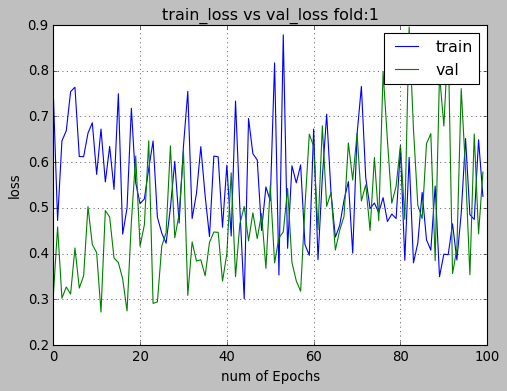

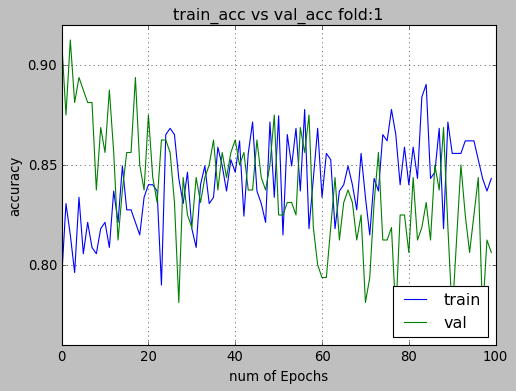

Train on 319 samples, validate on 160 samples
Epoch 1/100
319/319 [==============================] - 1s - loss: 0.8927 - acc: 0.7994 - val_loss: 0.3670 - val_acc: 0.8937
Epoch 2/100
319/319 [==============================] - 1s - loss: 1.0207 - acc: 0.8119 - val_loss: 0.1688 - val_acc: 0.9250
Epoch 3/100
319/319 [==============================] - 1s - loss: 0.6707 - acc: 0.8025 - val_loss: 0.3024 - val_acc: 0.8937
Epoch 4/100
319/319 [==============================] - 1s - loss: 0.5546 - acc: 0.8558 - val_loss: 0.2243 - val_acc: 0.9125
Epoch 5/100
319/319 [==============================] - 1s - loss: 0.5555 - acc: 0.8558 - val_loss: 0.1715 - val_acc: 0.9250
Epoch 6/100
319/319 [==============================] - 1s - loss: 0.6760 - acc: 0.8370 - val_loss: 0.2225 - val_acc: 0.9062
Epoch 7/100
319/319 [==============================] - 1s - loss: 0.6754 - acc: 0.8088 - val_loss: 0.3181 - val_acc: 0.8625
Epoch 8/100
319/319 [==============================] - 1s - loss: 0.6192 - acc: 0.7900

319/319 [==============================] - 1s - loss: 0.5722 - acc: 0.8276 - val_loss: 0.4109 - val_acc: 0.8562
Epoch 66/100
319/319 [==============================] - 1s - loss: 0.4103 - acc: 0.8683 - val_loss: 0.3524 - val_acc: 0.8375
Epoch 67/100
319/319 [==============================] - 1s - loss: 0.6206 - acc: 0.8213 - val_loss: 0.3384 - val_acc: 0.8562
Epoch 68/100
319/319 [==============================] - 1s - loss: 0.5696 - acc: 0.8495 - val_loss: 0.7125 - val_acc: 0.81870.85
Epoch 69/100
319/319 [==============================] - 1s - loss: 0.5992 - acc: 0.8589 - val_loss: 0.4606 - val_acc: 0.85620.864
Epoch 70/100
319/319 [==============================] - 1s - loss: 0.7896 - acc: 0.8245 - val_loss: 0.3373 - val_acc: 0.8687
Epoch 71/100
319/319 [==============================] - 1s - loss: 0.7787 - acc: 0.8276 - val_loss: 0.2951 - val_acc: 0.8687
Epoch 72/100
319/319 [==============================] - 1s - loss: 0.5131 - acc: 0.8527 - val_loss: 0.9234 - val_acc: 0.8000
Epoc

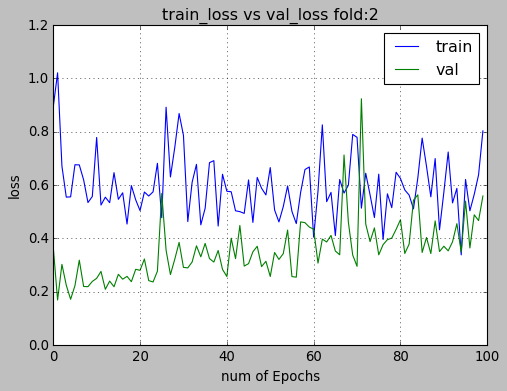

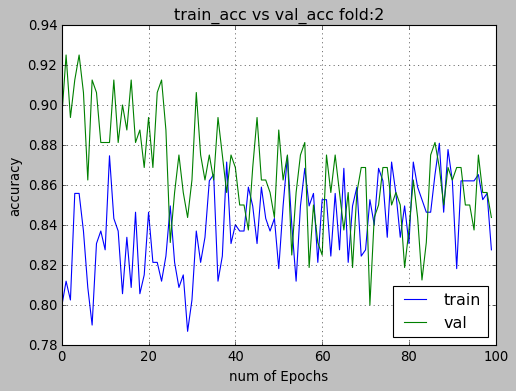

Train on 320 samples, validate on 159 samples
Epoch 1/100
320/320 [==============================] - 1s - loss: 0.9557 - acc: 0.7844 - val_loss: 0.4072 - val_acc: 0.91190.787
Epoch 2/100
320/320 [==============================] - 1s - loss: 0.8170 - acc: 0.7969 - val_loss: 0.2418 - val_acc: 0.9057
Epoch 3/100
320/320 [==============================] - 1s - loss: 0.6531 - acc: 0.8062 - val_loss: 0.1846 - val_acc: 0.9308
Epoch 4/100
320/320 [==============================] - 1s - loss: 0.8531 - acc: 0.8031 - val_loss: 0.2099 - val_acc: 0.9245
Epoch 5/100
320/320 [==============================] - 1s - loss: 0.6480 - acc: 0.8250 - val_loss: 0.2081 - val_acc: 0.9245
Epoch 6/100
320/320 [==============================] - 1s - loss: 0.5867 - acc: 0.8469 - val_loss: 0.1791 - val_acc: 0.9308
Epoch 7/100
320/320 [==============================] - 1s - loss: 0.5328 - acc: 0.8375 - val_loss: 0.2348 - val_acc: 0.9245
Epoch 8/100
320/320 [==============================] - 1s - loss: 0.6413 - acc: 0

320/320 [==============================] - 1s - loss: 0.5203 - acc: 0.8500 - val_loss: 0.4947 - val_acc: 0.8616
Epoch 66/100
320/320 [==============================] - 1s - loss: 0.6624 - acc: 0.8406 - val_loss: 0.3000 - val_acc: 0.8994
Epoch 67/100
320/320 [==============================] - 1s - loss: 0.5056 - acc: 0.8437 - val_loss: 0.3432 - val_acc: 0.8679
Epoch 68/100
320/320 [==============================] - 1s - loss: 0.6693 - acc: 0.8406 - val_loss: 0.8447 - val_acc: 0.8239
Epoch 69/100
320/320 [==============================] - 1s - loss: 0.4954 - acc: 0.8656 - val_loss: 0.3406 - val_acc: 0.8994
Epoch 70/100
320/320 [==============================] - 1s - loss: 0.8173 - acc: 0.8375 - val_loss: 0.3239 - val_acc: 0.86790.793 - ETA: 0s - loss: 0.7179 - acc
Epoch 71/100
320/320 [==============================] - 1s - loss: 0.5671 - acc: 0.8375 - val_loss: 0.7955 - val_acc: 0.8239
Epoch 72/100
320/320 [==============================] - 1s - loss: 0.5443 - acc: 0.8500 - val_loss: 0.

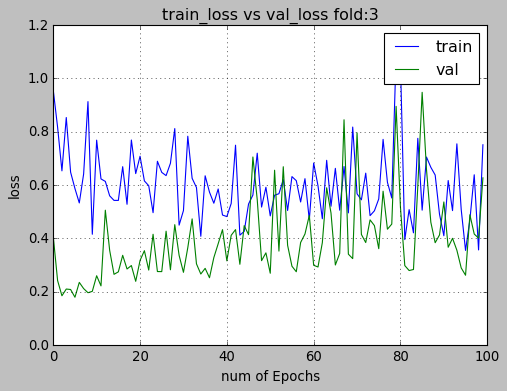

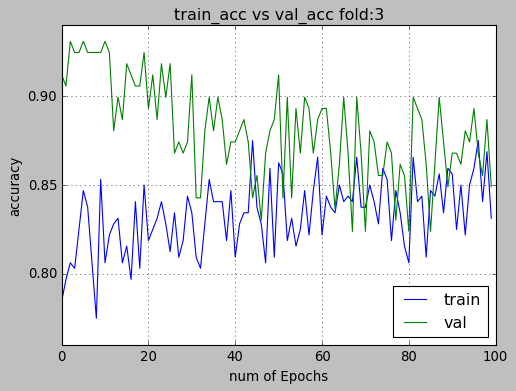

In [32]:

# Split the data into n-folds
X = train_set.copy()
y = Y_train.copy()
kf = KFold(n_splits=nth,random_state =9,shuffle=True)
kf.get_n_splits(X)
mean_=[]
print(kf)  
count=1
T_label=np_utils.to_categorical(t_label, nb_classes)
for train_index, test_index in kf.split(X):
   
    xx_train, xx_test = X[train_index], X[test_index]
    yy_train, yy_test = y[train_index], y[test_index]
    
    hist = model.fit(xx_train, yy_train, validation_data=(xx_test,yy_test),
          batch_size=batch_size,epochs = nb_epoch,validation_split=0.3, verbose=1)
    score = model.evaluate(test_set, T_label, batch_size=batch_size)
    print('Test score:', score)
    mean_.append(score)
    ## Plot the results
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    train_acc=hist.history['acc']
    val_acc=hist.history['val_acc']
    xc=range(nb_epoch)
    #
    plt.figure(1,figsize=(7,5))
    plt.plot(xc,train_loss)
    plt.plot(xc,val_loss)
    plt.xlabel('num of Epochs')
    plt.ylabel('loss')
    tt2='train_loss vs val_loss fold:'+ str(count)
    plt.title(tt2)
    plt.grid(True)
    plt.legend(['train','val'])
    print(plt.style.available) # use bmh, classic,ggplot for big pictures
    plt.style.use(['classic'])
    #
    plt.figure(2,figsize=(7,5))
    plt.plot(xc,train_acc)
    plt.plot(xc,val_acc)
    plt.xlabel('num of Epochs')
    plt.ylabel('accuracy')
    tit='train_acc vs val_acc fold:'+ str(count)
    plt.title(tit)
    plt.grid(True)
    plt.legend(['train','val'],loc=4)
    #print plt.style.available # use bmh, classic,ggplot for big pictures
    plt.style.use(['classic'])
    plt.show()
    count+=1

In [33]:
#results
# loss  accuracy
print(np.array(mean_))

[[ 0.57836369  0.80624999]
 [ 0.55880155  0.84374999]
 [ 0.62680662  0.8490566 ]]
